## Grupo 4 - Laboratorio 3 - Python

Katiuska Olivera Quevedo (20172533) <br/> 
Rosemery Fernandez Sanchez (20172635) <br/> 
Aliro Cabrera Florez (20152034) <br/> 
Jose Uscamayta Quispe (20195674) <br/> 

In [1]:
import pandas as pd
import numpy as np
import pyreadr
import math
import random
import os
import csv

 ## $Multicollinearity$

#### 1. Vectors (columns) follow a normal distribution. 

In [2]:
from numpy.random import seed
from numpy.random import normal
seed(1)
data = normal(loc=0, scale=1, size=9)
data

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 ])

In [3]:
A = np.random.normal(0, 1, (9, 10))
A

B = A[6,:]*A[7,:]*A[8,:]

C = np.vstack((A,B))

C = np.asmatrix(C)

np.shape(C)

np.linalg.inv(C)

matrix([[ 0.0128052 , -0.10750707,  0.0104504 ,  0.01167043, -0.15136225,
          0.05102232, -0.01205476, -0.10637597,  0.18461116, -0.7950649 ],
        [ 0.10126701, -0.10552813,  0.12914538,  0.5426404 , -0.76592865,
          0.12326756, -0.4563221 , -0.77176644,  0.25576021,  0.29852671],
        [-0.21524347,  0.49268034,  0.27829224,  0.43938226, -0.26052278,
          0.02464611, -0.30538419, -0.74276939,  0.29009797,  0.71850932],
        [-0.00775612, -0.8778531 , -0.51358108, -0.51489277, -0.62839837,
          0.32119926,  0.31668542,  0.58809612,  0.00915302, -1.04120761],
        [ 0.06418223,  0.53236467,  0.24047853,  0.88035471, -0.4332367 ,
         -0.11413124, -0.66898598, -0.56111309, -0.38969248,  0.6432621 ],
        [ 0.22921841,  0.68350818, -0.16658566, -0.22828743,  0.9442659 ,
          0.00325997,  0.04316991,  1.13681236, -0.11545856,  1.1187851 ],
        [-0.02619573,  0.15108568, -0.16249666, -0.24762992,  0.63599308,
         -0.08712577, -0.2234278

In the case of Python, the program gives an output, however, it is seen that for R the program gives an error as a response. This is because in R, the last vector of the matrix is a linear combination of the previous ones. This is a problem of perfect multicollinearity, because of this we have a non-singular matrix whose determinants are 0 and therefore a result cannot be obtained. In both programs multicollinearity is presented, but both have different packages, it could be said that R has an econometric cut base and Python, a statistical one.

## $Analyzing\;rct\;data\;with\;precision\;adjustment$

In [4]:
## loading the data
Penn = pd.read_csv("C:/Users/ok235/OneDrive/Documentos/GitHub/ECO224/Labs/data/penn_jae.dat" , sep='\s', engine='python')
n = Penn.shape[0]
p_1 = Penn.shape[1]
Penn = Penn[ (Penn['tg'] == 2) | (Penn['tg'] == 0) ]

In [5]:
Penn.head()

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,NaN
1,10635,2,7,3,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,NaN
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
9,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN


In [6]:
#this columns were not dropped out :  Unnamed: 13, recall
Penn.columns
Penn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 13911
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   abdt         5782 non-null   int64  
 1   tg           5782 non-null   int64  
 2   inuidur1     5782 non-null   int64  
 3   inuidur2     5782 non-null   int64  
 4   female       5782 non-null   int64  
 5   black        5782 non-null   int64  
 6   hispanic     5782 non-null   int64  
 7   othrace      5782 non-null   int64  
 8   dep          5782 non-null   int64  
 9   q1           5782 non-null   int64  
 10  q2           5782 non-null   int64  
 11  q3           5782 non-null   int64  
 12  q4           5782 non-null   int64  
 13  Unnamed: 13  5782 non-null   int64  
 14  q5           5782 non-null   int64  
 15  q6           5782 non-null   int64  
 16  recall       5782 non-null   int64  
 17  agelt35      5782 non-null   int64  
 18  agegt54      5782 non-null   int64  
 19  durab

#### Focus on the Treatment group 2

In [7]:
# Dependent variable
Penn['T2'] = (Penn[['tg']]==2).astype(int)

# Create category variable
Penn['dep'] = Penn['dep'].astype( 'category' )
Penn.head()

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,T2
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,NaN,0
1,10635,2,7,3,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,NaN,1
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
9,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,1


In [8]:
Penn['dep'].unique()

[2, 0, 1]
Categories (3, int64): [2, 0, 1]

#### Plot two histograms for treatment and control group to see the distribution of the outcome variable inuidur1

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [10]:
Penn1 = Penn[ (Penn['tg'] == 0)]
Penn2 = Penn[ (Penn['tg'] == 2)]

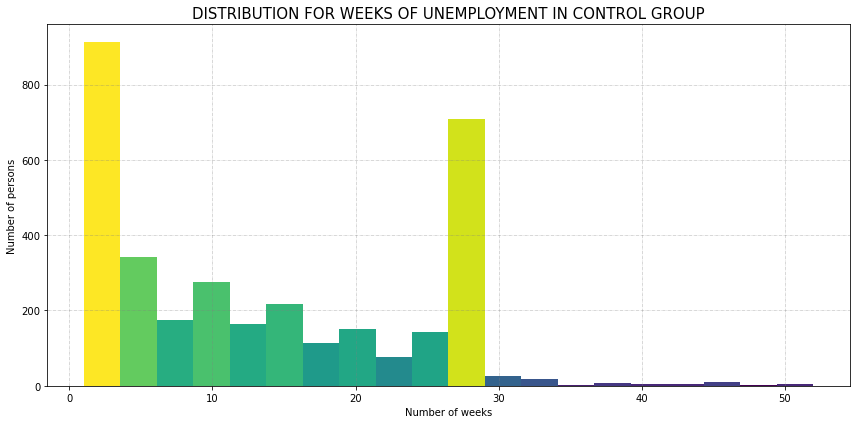

In [11]:
a = Penn1["inuidur1"]
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(12, 6),
                        tight_layout = True)

axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
 
# Creating histogram
N, bins, patches = axs.hist(a, bins = 20)

fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("Number of weeks")
plt.ylabel("Number of persons")
plt.title('DISTRIBUTION FOR WEEKS OF UNEMPLOYMENT IN CONTROL GROUP', size=15)

# Show plot
plt.show()

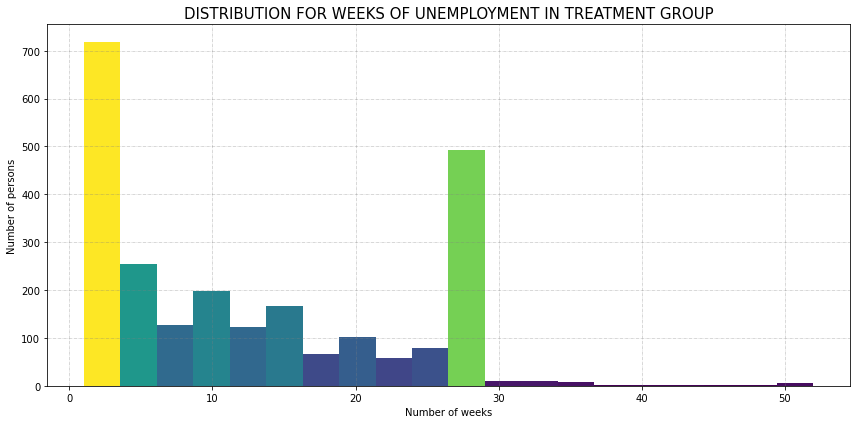

In [12]:
b = Penn2["inuidur1"]
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(12, 6),
                        tight_layout = True)

axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

N, bins, patches = axs.hist(b, bins = 20)

fracs = ((N**(6 / 10)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
plt.xlabel("Number of weeks")
plt.ylabel("Number of persons")
plt.title('DISTRIBUTION FOR WEEKS OF UNEMPLOYMENT IN TREATMENT GROUP', size=15)

plt.show()

### Model 
To evaluate the impact of the treatments on unemployment duration, we consider the linear regression model:

$$
Y =  D \beta_1 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W')' = 0,
$$

where $Y$ is  the  log of duration of unemployment, $D$ is a treatment  indicators,  and $W$ is a set of controls including age group dummies, gender, race, number of dependents, quarter of the experiment, location within the state, existence of recall expectations, and type of occupation.   Here $\beta_1$ is the ATE, if the RCT assumptions hold rigorously.


We also consider interactive regression model:

$$
Y =  D \alpha_1 + D W' \alpha_2 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W', DW')' = 0,
$$
where $W$'s are demeaned (apart from the intercept), so that $\alpha_1$ is the ATE, if the RCT assumptions hold rigorously.

Under RCT, the projection coefficient $\beta_1$ has
the interpretation of the causal effect of the treatment on
the average outcome. We thus refer to $\beta_1$ as the average
treatment effect (ATE). Note that the covariates, here are
independent of the treatment $D$, so we can identify $\beta_1$ by
just linear regression of $Y$ on $D$, without adding covariates.
However we do add covariates in an effort to improve the
precision of our estimates of the average treatment effect.

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import numpy as np

### Analysis

We consider 

*  classical 2-sample approach, no adjustment (CL)
*  classical linear regression adjustment (CRA)
*  interactive regression adjusment (IRA)

and carry out robust inference using the *estimatr* R packages. 

### Regress treatment on all covariates

I use data from R

In [14]:
y = Penn[['T2']].reset_index( drop = True )

In [15]:
result = pyreadr.read_r('C:/Users/ok235/OneDrive/Documentos/GitHub/ECO224/Labs/data/m_reg.RData')
X_vars = result['X1']

In [16]:
model = "T2~(female+black+othrace+C(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2"
model_results = sm.OLS( y, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

print(model_results.summary())
print( "Number of regressors in the basic model:",len(model_results.params), '\n')

                            OLS Regression Results                            
Dep. Variable:                     T2   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                     4.204
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           2.42e-39
Time:                        11:15:25   Log-Likelihood:                -4075.6
No. Observations:                5782   AIC:                             8357.
Df Residuals:                    5679   BIC:                             9043.
Df Model:                         102                                         
Covariance Type:                  HC1                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
(Intercept)              0.5171 

C:\Users\ok235\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 102, but rank is 101
  warnings.warn('covariance of constraints does not have full '


We see that that even though this is a randomized experiment, balance conditions are failed.

### Model Specification

In [17]:
# model specifications
# take log of inuidur1
Penn["log_inuidur1"] = np.log( Penn["inuidur1"] ) 
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] ) ).reset_index( drop = True )

# no adjustment (2-sample approach)
formula_cl = 'log_inuidur1 ~ T2'

# adding controls
# formula_cra = 'log_inuidur1 ~ T4 + (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2'
# Omitted dummies: q1, nondurable, muld

ols_cl = smf.ols( formula = formula_cl, data = Penn ).fit().get_robustcov_results(cov_type = "HC1")

#getting data
# Get data from R
result = pyreadr.read_r('C:/Users/ok235/OneDrive/Documentos/GitHub/ECO224/Labs/data/ols_cra_reg.RData')
X_vars = result['X1']

ols_cra = sm.OLS( log_inuidur1, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

# Results 
print(ols_cl.summary())
print(ols_cra.summary())

                            OLS Regression Results                            
Dep. Variable:           log_inuidur1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.879
Date:                Fri, 24 Sep 2021   Prob (F-statistic):             0.0154
Time:                        11:15:27   Log-Likelihood:                -9344.7
No. Observations:                5782   AIC:                         1.869e+04
Df Residuals:                    5780   BIC:                         1.871e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0568      0.021     98.158      0.0

C:\Users\ok235\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 103, but rank is 102
  warnings.warn('covariance of constraints does not have full '


The interactive specificaiton corresponds to the approach introduced in Lin (2013).

In [18]:
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] )).reset_index( drop = True )

In [19]:
# Reset index to estimation
# Get data from R
result = pyreadr.read_r('C:/Users/ok235/OneDrive/Documentos/GitHub/ECO224/Labs/data/ols_ira_reg.RData')
X_vars = result['S1']

ols_ira = sm.OLS( log_inuidur1, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

# Results 
print(ols_ira.summary())

                            OLS Regression Results                            
Dep. Variable:               inuidur1   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     35.02
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:15:30   Log-Likelihood:                -9129.1
No. Observations:                5782   AIC:                         1.866e+04
Df Residuals:                    5579   BIC:                         2.002e+04
Df Model:                         202                                         
Covariance Type:                  HC1                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
(Intercept)     

C:\Users\ok235\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 202, but rank is 188
  warnings.warn('covariance of constraints does not have full '


### Next we try out partialling out with lasso

In [20]:
import hdmpy as hdm

In [21]:
from sklearn.linear_model import LassoCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [22]:
result = pyreadr.read_r('C:/Users/ok235/OneDrive/Documentos/GitHub/ECO224/Labs/data/rlasso_ira_reg.RData')
X_vars = result['S']

In [23]:
result = hdm.rlassoEffects( X_vars, log_inuidur1, index = 0 )       

rlasso_ira = pd.DataFrame(np.array( (result.res['coefficients'][0] , result.res['se'][0] , \
           result.res['t'][0] , result.res['pval'][0] ) ).reshape(1, 4) , columns = ['Coef.' , \
                            "Std.Err." , "t" , 'P>|t|'] , index = ['T2'])
rlasso_ira

,Coef.,Std.Err.,t,P>|t|
T2,-0.074574,0.032104,-2.322849,0.020187


### Results

Treatment group 4 experiences an average decrease of about $7.8\%$ in the length of unemployment spell.


Observe that regression estimators delivers estimates that are slighly more efficient (lower standard errors) than the simple 2 mean estimator, but essentially all methods have very similar standard errors. From IRA results we also see that there is not any statistically detectable heterogeneity.  We also see the regression estimators offer slightly lower estimates -- these difference occur perhaps to due minor imbalance in the treatment allocation, which the regression estimators try to correct.


In [25]:
table2 = np.zeros((2, 4))
table2[0,0] = ols_cl.summary2().tables[1]['Coef.']['T2']
table2[0,1] = ols_cra.summary2().tables[1]['Coef.']['T2TRUE']
table2[0,2] = ols_ira.summary2().tables[1]['Coef.']['T2TRUE']
table2[0,3] = rlasso_ira['Coef.']['T2']

table2[1,0] = ols_cl.summary2().tables[1]['Std.Err.']['T2']
table2[1,1] = ols_cra.summary2().tables[1]['Std.Err.']['T2TRUE']
table2[1,2] = ols_ira.summary2().tables[1]['Std.Err.']['T2TRUE']
table2[1,3] = rlasso_ira['Std.Err.']['T2']

table2 = pd.DataFrame(table2, columns = ["$CL$", "$CRA$", "$IRA$", "$IRA Lasso$"], \
                      index = ["estimate","standard error"])
table2
table2.to_latex
print(table2.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &      \$CL\$ &     \$CRA\$ &     \$IRA\$ &  \$IRA Lasso\$ \\
\midrule
estimate       & -0.078825 & -0.071207 & -0.069904 &    -0.074574 \\
standard error &  0.032509 &  0.032044 &  0.032076 &     0.032104 \\
\bottomrule
\end{tabular}



## $Plots$


In [26]:
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [29]:
coef1 =ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xfemale']
err1 =ols_ira.summary2().tables[1]['Std.Err.']['T2TRUE:Xfemale']

In [30]:
coef2 =ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xblack']
err2=ols_ira.summary2().tables[1]['Std.Err.']['T2TRUE:Xblack']

In [31]:
coef3 =ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xagelt35']
err3=ols_ira.summary2().tables[1]['Std.Err.']['T2TRUE:Xagelt35']

In [32]:
coef4 =ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xfactor(dep)1']
err4=ols_ira.summary2().tables[1]['Std.Err.']['T2TRUE:Xagelt35']

In [33]:
df=pd.DataFrame({"variable":['T2*female','T2*black','T2*agelt35','T2*factor(dep)1'], 
                 "coef":[coef1,coef2,coef3,coef4],
                 "err":[err1,err2,err3,err4]}) 
df

,variable,coef,err
0,T2*female,-0.659750,0.549897
1,T2*black,0.452557,0.510319
2,T2*agelt35,1.123320,0.637419
3,T2*factor(dep)1,0.763602,0.637419


<ipython-input-34-aeed99d7878d>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(df.shape[0]),


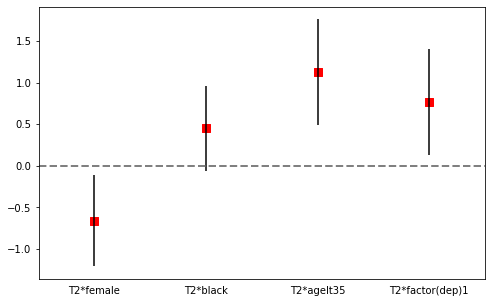

In [34]:
fig, ax = plt.subplots(figsize=(8, 5))
df.plot(x='variable', y='coef', kind='bar', 
             ax=ax, color='none',
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(df.shape[0]), 
           marker='s', s=80, 
           y=df['coef'], color='red')
ax.axhline(y=0, linestyle='--', color='gray', linewidth=2)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['T2*female','T2*black','T2*agelt35','T2*factor(dep)1'], 
                       rotation=0, fontsize=10)

  
Statistically no significance is found at the 5% by default. This suggests that there are no effects for female treated patients, black test treated persons and a 35-year-old person with a dependent.